# Определение стоимости автомобилей

# Описание проекта
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Инструкция по выполнению проекта
Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг. 

Поэкспериментируйте и сравните характеристики моделей: время обучения, время предсказания, точность результата.

# Описание данных
Данные находятся в файле `/datasets/autos.csv`.

**Признаки**
* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `Repaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя

**Целевой признак**
* `Price` — цена (евро)

<a id="point0"></a>
# Оглавление
* [1 Загрузка и изучение данных](#Загрузка-и-изучение-данных)
  * [1.1 Загрузка данных](#Загрузка-данных)
  * [1.2 Изучение данных](#Изучение-данных)
* [2 Предобработка данных](#Предобработка-данных)
  * [2.1 Переименование столбцов](#Переименование-столбцов)
  * [2.2 Изменение типов данных](#Изменение-типов-данных)
  * [2.3 Обработка дубликатов](#Обработка-дубликатов)
  * [2.4 Обработка пропусков](#Обработка-пропусков)
    * [2.4.1 Пропуски в признаке <code>model</code>](#Пропуски-в-признаке-model)
    * [2.4.2 Пропуски в признаке <code>vehicle_type</code>](#Пропуски-в-признаке-vehicle_type)
    * [2.4.3 Пропуски в признаке <code>gearbox</code>](#Пропуски-в-признаке-gearbox)
    * [2.4.4 Пропуски в признаке <code>fuel_type</code>](#Пропуски-в-признаке-fuel_type)
    * [2.4.5 Пропуски в признаке <code>repaired</code>](#Пропуски-в-признаке-repaired)
  * [2.5 Удаление неинформативных признаков](#Удаление-неинформативных-признаков)
* [3 Исследовательский анализ данных](#Исследовательский-анализ-данных)
  * [3.1 Анализ непрерывных числовых признаков](#Анализ-непрерывных-числовых-признаков)
    * [3.1.1 Признак <code>price</code>](#Признак-price)
    * [3.1.2 Признак <code>reg_year</code>](#Признак-reg_year)
    * [3.1.3 Признак <code>power</code>](#Признак-power)
  * [3.2 Анализ дискретных числовых и категориальных признаков](#Анализ-дискретных-числовых-и-категориальных-признаков)
    * [3.2.1 Признак <code>vehicle_type</code>](#Признак-vehicle_type)
    * [3.2.2 Признак <code>gearbox</code>](#Признак-gearbox)
    * [3.2.3 Признак <code>model</code>](#Признак-model)
    * [3.2.4 Признак <code>kilometer</code>](#Признак-kilometer)
    * [3.2.5 Признак <code>fuel_type</code>](#Признак-fuel_type)
    * [3.2.6 Признак <code>brand</code>](#Признак-brand)
    * [3.2.7 Признак <code>repaired</code>](#Признак-repaired)
* [4 Корреляционный анализ](#Корреляционный-анализ)
* [5 Обучение моделей](#Обучение-моделей)
  * [5.1 Создание выборок](#Создание-выборок)
  * [5.2 Формирование пайплайна](#Формирование-пайплайна)
  * [5.3 Обучение моделей](#Обучение-моделей)
* [6 Анализ моделей](#Анализ-моделей)
  * [6.1 Выбор лучшей модели по заявленым критериям](#Выбор-лучшей-модели-по-заявленым-критериям)
  * [6.2 Оценка качества модели на тестовых данных](#Оценка-качества-модели-на-тестовых-данных)
  * [6.3 Проверка модели на адекватность](#Проверка-модели-на-адекватность)
* [7 Общий вывод](#Общий-вывод)
* [8 Чек-лист проверки](#Чек-лист-проверки)

## Загрузка и изучение данных
Импорт необходимых для выполнения проекта библиотек:

In [1]:
!pip install phik -q
!pip install scikit-learn==1.3.2 -q

In [2]:
import pandas as pd              # Импорт библиотеки pandas
import matplotlib.pyplot as plt  # Импорт библиотеки для работы с графиками
import numpy as np               # Импорт библиотеки NumPy
from scipy import stats          # Импорт статистических функций из библиотеки SciPy
from phik import phik_matrix     # Импорт функции матрицы корреляции Фи
from phik.report import plot_correlation_matrix # Импорт функции отображения матрицы корреляции
import time # Импорт библиотеки для работы с датами и временем

from sklearn.model_selection import (train_test_split, # Импорт функции для разбивки датасета на выборки
                                     GridSearchCV) # Импорт инструмента автоматизированного поиска гиперпараметров

from sklearn.compose import ColumnTransformer # Импорт инструмента подготовки данных
from sklearn.pipeline import Pipeline         # Импорт Pipeline

from sklearn.impute import SimpleImputer # Импорт инструмента обработки пропусков

from sklearn.preprocessing import (OneHotEncoder,  # Кодировщик OneHotEncoder
                                   OrdinalEncoder) # Кодировщик OrdinalEncoder

from sklearn.metrics import make_scorer, mean_squared_error # Импорт метрик

from sklearn.tree import DecisionTreeRegressor # Дерево решений
from lightgbm import LGBMRegressor # Модель LightGBM
from sklearn.dummy import DummyRegressor # Импорт Dummy-модели

Установка вспомогательных настроек, функций и констант:

In [122]:
# формат вывода float-чисел датафрейма:
pd.options.display.float_format = ("{:.2f}".format)

# настройка отображения графиков:
plt.rcParams["figure.figsize"] = (15,7) # размер графиков по умолчанию:
plt.rcParams.update({'axes.grid' : True, 'grid.alpha': 0.33, 'grid.linestyle': '--'}) # отображение сетки:

# установка цветовой палитры:
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# переменные для форматирования шрифта при выводе информации:
green, red, bold, end = '\33[92m', '\33[91m', '\33[1m', '\33[0m'

# создание переменной псевдослучайности
RANDOM_STATE = 42

def dataset_info(df):
    """Функция для вывода общей информации о датасете"""
    print('• ' + '\33[4m' + 'Первые 10 строк датасета:' + end, f'[{df.dsc}]')
    display(df.head(10))
    print('• ' + '\33[4m' + 'Основная информация о датасете:' + end, f'[{df.dsc}]')
    df.info()

def na_stat(feature):
    """Функция для отображения количества пропусков"""
    na_count = data[feature].isna().sum()
    display(pd.DataFrame({'Количество':[na_count],'Доля, %':[100 * na_count / data.shape[0]]}, index=[feature]))

def na_group(g, na, head=10):
    """Функция для отображения количества пропусков в разбивке по значениям признака"""
    # Группируем и вычисляем нужные метрики
    result = data.groupby(g).agg(
        total=(na, 'size'), # Общее количество строк для каждого бренда
        count=(na, lambda x: x.isna().sum())  # Количество пропусков в model
    ).reset_index()
    
    # Вычисляем процент пропусков
    result['%'] = result['count'] / result['total'] * 100
    display(result.sort_values(by='%', ascending=False).head(head))

def stat_num(data_set, feature, rv=2, bins=50):
    """
    Функция отображения распределения числового признака.
    Для непрерывных величин строится диаграммы размаха и гистограммы распредления.
    Выводится описательная информация.
    """
    param = data_set[feature]
    dsr = param.describe()
    iqr = dsr['75%'] - dsr['25%']
    
    kde = stats.gaussian_kde(param)
    xx = np.linspace(dsr['min'], dsr['max'], bins)
    
    # конфигурация графиков:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    # диаграмма размаха:
    param.plot(kind='box', ax=axes[0])
    axes[0].set_title('Разброс значений признака')
    axes[0].set_ylabel(feature_dsc[feature])
    
    # гистограмма:
    bns =  plt.hist(param, bins=bins, orientation='horizontal')
    scale = max(bns[0]) / max(kde(xx))
    # масштабированная линия плотности:
    plt.plot(0.9 * scale * kde(xx), xx)
    axes[1].set_title('Гистограмма распределения')
    axes[1].set_xlabel('Частота')
    axes[1].axhline(dsr['mean'], color='r', linestyle='--', label='Среднее значение')
    axes[1].axhline(dsr['50%'], color='r', linestyle=':', label='Медиана')
    axes[1].legend()
    plt.show()
    
    # описательная информация:
    print(f"Описательная информация для признака '{feature}':")
    print(bold + "Минимальное значение:" + end, 
          round(dsr['min'], 2), bold + "\t|\tМаксимальное значение:" + end, round(dsr['max'], 2))
    print(bold + "Среднее значение:" + end, f"{round(dsr['mean'], rv)}")
    print(bold + "Медиана:" + end, round(dsr['50%'], 2))
    print(bold + "Межквартильный размах IQR:" + end, round(iqr, rv))
    print(bold + "Границы нормальных значений:" + end, 
          f"от {round(max([dsr['25%'] - 1.5*iqr, dsr['min']]), rv)} до",
          f"{round(min([dsr['75%'] + 1.5*iqr, dsr['max']]), rv)}")

def stat_cat(data_set, param, labels=False, prc=0):
    """
    Функция анализа распределения категориальных 
    или дискретных числовых признаков
    """
    data_set_plt = data_set[param].value_counts().sort_values()
    
    if labels:
        pass
    else:
        labels = data_set[param].value_counts().sort_values().index

    # конфигурация графиков:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    # столбчатый график:
    data_set_plt.plot(kind='barh', color=color_list, ax=axes[0])
    axes[0].set_title('Абсолютное распределение')
    axes[0].set_ylabel(feature_dsc[param])
    axes[0].set_xlabel('Частота')
    axes[0].set_yticklabels(labels)
    
    
    # круговая диаграмма:
    total = data_set_plt.sum()
    percentages = (data_set_plt / total * 100)
    labels = [index if p >= prc else '' for index, p in zip(data_set_plt.index, percentages)]
    
    data_set_plt.plot(kind='pie', autopct=lambda p: f'{p:.1f}%' if p >= prc else '', 
                      labeldistance=1.15,
                      pctdistance=0.85, 
                      
                              
                      ax=axes[1], labels=labels)
    axes[1].set_title('Относительное распределение')
    axes[1].yaxis.set_visible(False)
    
    plt.suptitle('Распределение значений признаков')
    plt.show()
    
    # описательная информация:
    print(f"Значения признака '{param}' распределены следующим образом:")
    print(bold + "- Всего значений:" + end, len(data_set))
    print(bold + "- Уникальных значений:" + end, len(data_set[param].dropna().unique()), 
          data_set[param].dropna().unique())
    print("В том числе:")
    for el in data_set[param].dropna().unique():
        print(bold + f"- {el}:" + end, len(data_set[data_set[param] == el]), 
              f"({round(100*len(data_set[data_set[param] == el])/len(data_set), 2)}%)")

def show_gs_result(data):
    """
    Показывает 5 лучших по метрике моделей среди результатов GridSearchCV
    """
    result_reg = pd.DataFrame(data.cv_results_).sort_values('rank_test_score')[
    ['rank_test_score', 'param_models', 'mean_test_score','mean_fit_time','params']
    ]
    result_reg['mean_test_score'] = -result_reg['mean_test_score']
    result_reg['param_models'] = result_reg['param_models'].astype('str').str.replace('\(.*','', regex=True)    
    return result_reg.head(5)

def models_compare(df):
    """
    Визуализация сравнительных характеристик моделей:
    mean_test_score, mean_fit_time, time_pred
    """
    # Создаем график
    fig, ax1 = plt.subplots()  # Увеличиваем ширину для читаемости
    
    # Настройки для столбцов
    width = 0.15  # Уменьшаем ширину столбцов, чтобы вместить три
    x = range(df.shape[0])  # Позиции по оси X
    
    # Левая ось Y: mean_test_score
    ax1.bar([i - width for i in x], df['mean_test_score'], width, color=color_list[0], label='Средняя метрика')
    ax1.set_xlabel('Наименование моделей')
    ax1.set_ylabel('Метрика RMSE')
    ax1.tick_params(axis='y')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df.index)
    
    # Правая ось Y: mean_fit_time и time_pred
    ax2 = ax1.twinx()  # Создаем вторую ось Y
    ax2.bar([i for i in x], df['mean_fit_time'], width, color=color_list[1], label='Среднее время обучения')
    ax2.bar([i + width for i in x], df['time_pred'], width, color=color_list[2], label='Время предсказания')
    ax2.set_ylabel('Время (секунды)')
    ax2.tick_params(axis='y')
    
    # Заголовок и легенда
    plt.title('Сравнительные характеристики моделей')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94))  # Увеличиваем ncol до 3
    
    # Показываем график
    plt.tight_layout()
    plt.grid(visible=False)
    plt.show()

### Загрузка данных
Загрузим данные в датафрейм:

In [4]:
data = pd.read_csv('/datasets/autos.csv')

### Изучение данных
Выведем общую информацию об имеющихся данных:

In [5]:
print('• ' + '\33[4m' + 'Первые 10 строк датасета:' + end)
display(data.head(10))
print('\n• ' + '\33[4m' + 'Основная информация о датасете:' + end)
data.info()

• Первые 10 строк датасета:


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06



• Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-nul

**Вывод**:
Датасет 'data':
* Состоит из 354369 строк и 16 столбцов.
* Данные описывают характеристики автомобилей, а также информацию об анкетах.
* Признаки представлены двумя типами данных - 'object' и 'int64'
* Признаки 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired' содержат пропуски данных.
* Имеющиеся данные соответствуют описанию и структуре, заявленным заказчиком.
* Значения ячеек выглядят реалистично.
* Значения ячеек выглядят уникально.

[Вернуться к оглавлению](#point0)

## Предобработка данных
### Переименование столбцов
Отобразим заголовки столбцов для наших данных:

In [6]:
print(data.columns.to_list())

['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen']


Преобразуем заголовки к змеиному регистру и заменим некоторые слова для сокращения длины заголовка:

In [7]:
cols_fixed = list()

# преобразование регистра:
for col in data.columns:    
    cols_fixed.append(''.join('_' + k.lower() if (k.isupper() and i > 0) else k.lower() for i, k in enumerate(col)))

# сокращение некоторых слов:
cols_fixed = [i.replace('registration','reg') for i in cols_fixed]

# обновление заголовков:
data.columns = cols_fixed
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'reg_year', 'gearbox', 'power',
       'model', 'kilometer', 'reg_month', 'fuel_type', 'brand', 'repaired',
       'date_created', 'number_of_pictures', 'postal_code', 'last_seen'],
      dtype='object')

[Вернуться к оглавлению](#point0)

### Изменение типов данных
Для имеющихся данных отобразим 1 произвольную строку датасета, а также строку с указанием типов данных:

In [8]:
pd.concat([data.sample(), 
    pd.DataFrame(data.dtypes, columns=['dtypes']).transpose()])

,date_crawled,price,vehicle_type,reg_year,gearbox,power,model,kilometer,reg_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
59685,2016-03-05 15:59:21,500,bus,1999,auto,188,other,150000,3,petrol,chevrolet,no,2016-03-05 00:00:00,0,1855,2016-03-09 03:44:41
dtypes,object,int64,object,int64,object,int64,object,int64,int64,object,object,object,object,int64,int64,object


Обучающие и целевой признаки имеют типы данных `object` и `int64` - эти форматы подходят для работы. 

Есть ряд признаков: `date_crawled`, `date_created`, `last_seen` с информацией о времени, но я предполагаю, что эти признаки не будут использованы для анализа данных и обучения модели, поэтому и нет смысла изменять для них тип данных.

**Вывод**: типы данных признаков не требуют изменений.

[Вернуться к оглавлению](#point0)

### Обработка дубликатов
Отобразим количество явных дубликатов данных:

In [9]:
data.duplicated().sum()

4

Отобразим дублирующиеся строки:

In [10]:
data[data.duplicated()]

,date_crawled,price,vehicle_type,reg_year,gearbox,power,model,kilometer,reg_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


Мы имеем набор данных, среди которых есть уникальные по сути значения, например, `date_crawled` — дата скачивания анкеты из базы. Если в данных есть полные дубликаты строк с такими значениями, то это явно говорит о повторении.

Удалим полные дубли:

In [11]:
data.drop_duplicates(inplace=True)

Еще раз проверим наличие полных дублей:

In [12]:
data.duplicated().sum()

0

**Вывод**: найдено и удалено 4 полных дубля.

[Вернуться к оглавлению](#point0)

### Обработка пропусков
Отобразим общее количество пропусков по признакам:

In [13]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
reg_year                  0
gearbox               19833
power                     0
model                 19705
kilometer                 0
reg_month                 0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

#### Пропуски в признаке `model`
Отобразим количество пропусков для признака `model`:

In [14]:
na_stat('model')

,Количество,"Доля, %"
model,19705,5.56


Отобразим количество пропусков в признаке `model` в разбивке по брендам:

In [15]:
na_group('brand', 'model')

,brand,total,count,%
33,sonstige_autos,3374,3374,100.00
28,rover,486,82,16.87
37,trabant,589,95,16.13
7,daewoo,542,46,8.49
25,peugeot,10998,891,8.10
16,lada,225,15,6.67
12,hyundai,3587,228,6.36
3,chevrolet,1754,110,6.27
19,mazda,5615,352,6.27
4,chrysler,1439,89,6.18


В первую очередь обращает на себя внимание бренд `sonstige_autos` у которого 100% признака `model` имеют пропуски. 
Если перевести с немецкого языка `sonstige autos` получим - `другие автомобили`.

Отобразим список уникальных значений признака `brand`:

In [16]:
data['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

Можно предположить, что брендом `sonstige_autos` представлены 'другие' автомобильные бренды без указания модели - как видно, отдельной такой категории нет. Поэтому, для наглядности, я переименую бренд `sonstige_autos` в `other`, а пропуски в `model` также заполню значением `other`.

In [17]:
data['brand'] = data['brand'].replace('sonstige_autos', 'other')
data.loc[data['brand'] == 'other', 'model'] = data.loc[data['brand'] == 'other', 'model'].fillna('other')
data[data['brand'] == 'other'].head(2)

,date_crawled,price,vehicle_type,reg_year,gearbox,power,model,kilometer,reg_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
59,2016-03-29 15:48:15,1,suv,1994,manual,286,other,150000,11,NaN,other,NaN,2016-03-29 00:00:00,0,53721,2016-04-06 01:44:38
306,2016-03-21 14:38:37,200,NaN,2009,NaN,0,other,10000,0,NaN,other,NaN,2016-03-21 00:00:00,0,6493,2016-03-24 02:47:34


Еще раз отобразим таблицу с пропусками в разбивке по брендам:

In [18]:
na_group('brand', 'model')

,brand,total,count,%
29,rover,486,82,16.87
37,trabant,589,95,16.13
7,daewoo,542,46,8.49
26,peugeot,10998,891,8.10
16,lada,225,15,6.67
12,hyundai,3587,228,6.36
3,chevrolet,1754,110,6.27
19,mazda,5615,352,6.27
4,chrysler,1439,89,6.18
0,alfa_romeo,2314,137,5.92


Для остальных брендов я планирую заполнить пропуски в признаке `model` самым популярным значением для групп данных в разбивке по категориям: `brand`, `power`, `reg_year`.

Для оценки качества данного алгоритма заполнения пропусков я зафиксирую распределение данных для одного из самых популярных автомобильных брендов, который имеет довольно большую долю пропусков - `peugeot` (8.1% пропусков).

In [19]:
peugeot_before = data[data['brand'] == 'peugeot']['model']

Отобразим текущее количество пропусков для признака `model`:

In [20]:
data['model'].isna().sum()

16331

Осуществляю заполенение пропусков в разбивке по категориям: `brand`, `power`, `reg_year`. Заполнение осуществляется модой (`mode()`) для таких случаев, когда мода существует и не равна `nan`. Иначе подставляется значение `nan`:

In [21]:
data['model'] = data['model'].fillna(
    data.groupby(['brand', 'power', 'reg_year'])['model'].transform(
        lambda x: x.mode()[0] if (not x.mode().empty and pd.notna(x.mode()[0])) else np.nan
    )
)

Подсчитаем оставшееся количество пропусков:

In [22]:
data['model'].isna().sum()

1269

Остальные пропуски я заполню модой в разбивке по категориям: `brand`, `power`. В случае несоблюдения условия группировки, присвою значение `other`:

In [23]:
data['model'] = data['model'].fillna(
    data.groupby(['brand', 'power'])['model'].transform(
        lambda x: x.mode()[0] if (not x.mode().empty and pd.notna(x.mode()[0])) else 'other'
    )
)

Проверим количество пропусков:

In [24]:
data['model'].isna().sum()

0

Пропуски в `model` заполнены.

Проверим, не появлись ли новые дубликаты:

In [25]:
data.duplicated().sum()

0

Дубликатов не появилось.

Теперь снова зафиксируем распределение признака `model` для бренда `peugeot` и отобразим данные в таблицы:

In [26]:
# фиксация распределения после заполнения пропусков:
peugeot_after = data[data['brand'] == 'peugeot']['model']

# таблица сравнения "до / после":
df = pd.DataFrame({'before':peugeot_before.value_counts(), # подсчет значений
                    'after': peugeot_after.value_counts()})
df['prc'] = (-1 + df['after'] / df['before']) * 100 # добавление столбика с процентным соотношением
df

,before,after,prc
2_reihe,4816,5384,11.79
3_reihe,2171,2309,6.36
1_reihe,1206,1325,9.87
other,1163,1210,4.04
4_reihe,638,656,2.82
5_reihe,113,114,0.88


Визуально сравним данные с помощью столбчатого графика:

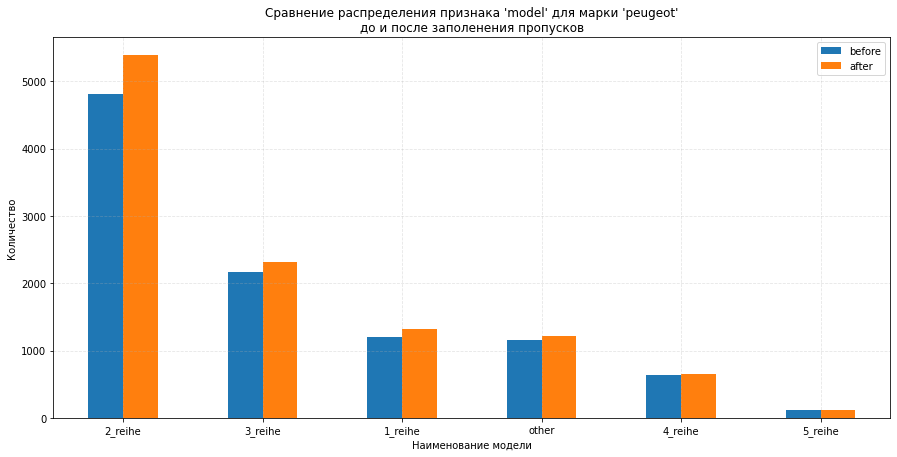

In [27]:
df.drop('prc', axis=1).plot(kind='bar', rot=0)
plt.xlabel('Наименование модели')
plt.ylabel('Количество')
plt.title("Сравнение распределения признака 'model' для марки 'peugeot'\nдо и после заполенения пропусков")
plt.show()

Как видно, заполнение пропусков для признака `model` на примере бренда `peugeot` произошло довольно равномерно, без внесения дисбаланса. 

**Выводы:**
* В имеющемся наборе данных у признака `model` было 19705 пропусков, что составляет 5.56% от всего объема данных.
* Пропуски значений для признака `model` заполнены в два подхода:
  * В первую очередь заполнены пропуски в разбивке данных по категориям: `brand`, `power`, `reg_year`.
  * Во вторую очередь в разбивке по категориям: `brand`, `power`.
* Произведена оценка характера распределения данных при заполнении пропусков у признака `model` на примере бренда `peugeot`: заполнение прошло без внесения дисбаланса.

[Вернуться к оглавлению](#point0)

#### Пропуски в признаке `vehicle_type`

Отобразим количество пропусков для признака `vehicle_type`:

In [28]:
na_stat('vehicle_type')

,Количество,"Доля, %"
vehicle_type,37490,10.58


Признак `vehicle_type` имеет довольно большое число пропусков, но я решаю не заполнять эти пропуски: тип кузова можно определить из названия бренда авто и его модели.

**Вывод**: 
* Признак `vehicle_type` имеет 10% пропусков.
* Решено оставить данные как есть.

[Вернуться к оглавлению](#point0)

#### Пропуски в признаке `gearbox`
Отобразим количество пропусков для признака `gearbox`:

In [29]:
na_stat('gearbox')

,Количество,"Доля, %"
gearbox,19833,5.60


Более 5% значений признака `gearbox` имеют пропуски. Я решаю оставить эти пропуски как есть.

**Вывод**: 
* Признак `gearbox` имеет 5% пропусков.
* Решено оставить данные как есть.

[Вернуться к оглавлению](#point0)

#### Пропуски в признаке `fuel_type`
Отобразим количество пропусков для признака `fuel_type`:

In [30]:
na_stat('fuel_type')

,Количество,"Доля, %"
fuel_type,32895,9.28


Более 9% значений признака `fuel_type` имеют пропуски. Я решаю оставить эти пропуски как есть.

**Вывод**: 
* Признак `fuel_type` имеет 9% пропусков.
* Решено оставить данные как есть.

[Вернуться к оглавлению](#point0)

#### Пропуски в признаке `repaired`
Отобразим количество пропусков для признака `repaired`:

In [31]:
na_stat('repaired')

,Количество,"Доля, %"
repaired,71154,20.08


Признак `repaired` имеет очень большое количество пропусков - порядка 20%. 

В то же время, я считаю, что это очень информативный для определения цены авто признак. Если бы не было пропусков, его можно было бы более эффективно использовать для обучения моделей.

Но очень сложно корректно заполнить такое большое количество пропусков только на основе имеющейся в распоряжении информации - интуитивный подход заполнения тут наврядли сработает. Оставлю данные как есть.

**Вывод**: 
* Признак `repaired` имеет 20% пропусков.
* Решено оставить данные как есть.

[Вернуться к оглавлению](#point0)

### Удаление неинформативных признаков
Для набора данных имеются следующие признаки:

Признак|Описание
-|-
date_crawled|дата скачивания анкеты из базы
vehicle_type|тип автомобильного кузова
reg_year|год регистрации автомобиля
gearbox|тип коробки передач
power|мощность (л. с.)
model|модель автомобиля
kilometer|пробег (км)
reg_month|месяц регистрации автомобиля
fuel_type|тип топлива
brand|марка автомобиля
repaired|была машина в ремонте или нет
date_created|дата создания анкеты
number_of_pictures|количество фотографий автомобиля
postal_code|почтовый индекс владельца анкеты (пользователя)
last_seen|дата последней активности пользователя

Между целевым признаком (`price`) и обучающими признаками:
* `date_crawled`
* `date_created`
* `number_of_pictures`
* `postal_code`
* `last_seen`<br>
<ins>в общем случае</ins> для <ins>рассматриваемой задачи</ins> **не должно быть прямой связи**.



Признак `reg_month`, наиболее вероятно, тоже не влияет на целевой признак. Отобразим характер взаимосвязи:

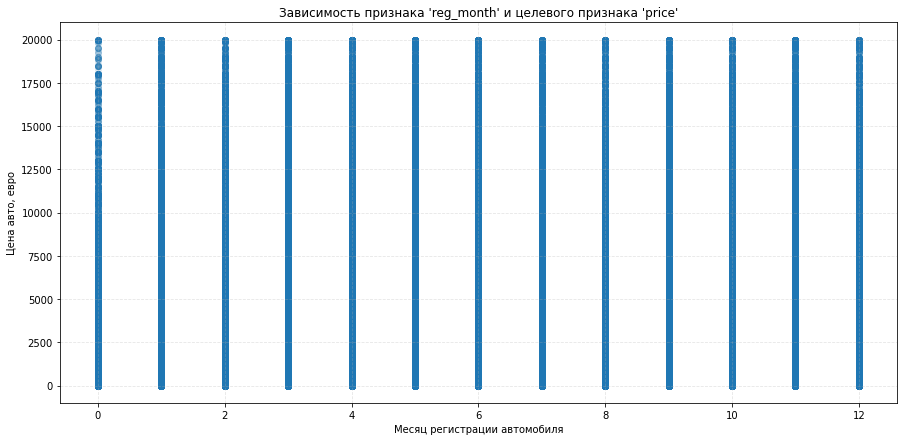

In [32]:
plt.scatter(data['reg_month'],data['price'], alpha=0.1)
plt.xlabel("Месяц регистрации автомобиля")
plt.ylabel('Цена авто, евро')
plt.title("Зависимость признака 'reg_month' и целевого признака 'price'")
plt.show()

Визуально не заметно какой-либо явной зависимости между `reg_month` и целевым признаком. 

Перед удалением неинформативных признаков я зафиксирую максимальное значение года даты скачивания анкеты из базы. Эта информация понадобится для фильтрации данных:

In [33]:
display(data['date_crawled'].max())

year_max = int(data['date_crawled'].max()[:4])
print('year_max:', year_max)

'2016-04-07 14:36:58'

year_max: 2016


Удалю данные признаки из датасета.

In [34]:
data.drop(['date_crawled','date_created','number_of_pictures','postal_code','last_seen', 'reg_month'], 
          axis=1, inplace=True)

Отобразим структуру данных после удаления признаков:

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         354365 non-null  int64 
 1   vehicle_type  316875 non-null  object
 2   reg_year      354365 non-null  int64 
 3   gearbox       334532 non-null  object
 4   power         354365 non-null  int64 
 5   model         354365 non-null  object
 6   kilometer     354365 non-null  int64 
 7   fuel_type     321470 non-null  object
 8   brand         354365 non-null  object
 9   repaired      283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 37.8+ MB


**Вывод**: Перечисленные признаки:

Признак|Описание
-|-
date_crawled|дата скачивания анкеты из базы
reg_month|месяц регистрации автомобиля
date_created|дата создания анкеты
number_of_pictures|количество фотографий автомобиля
postal_code|почтовый индекс владельца анкеты (пользователя)
last_seen|дата последней активности пользователя

удалены из данных как неинформативные.

## Исследовательский анализ данных
Для рассматриваемых данных признаки распределены следующим образом:
* **Числовые непрерывные признаки**: `price`, `reg_year`, `power`.
* **Числовые дискретные и категориальные признаки**: `vehicle_type`, `gearbox`, `model`, `kilometer`, `fuel_type`, `brand`, `repaired`.

Хотя признак `kilometer` и представлен числовыми значениями (`int`), по характеру значений он больше подходит к категориальными данным.

Для более наглядного представления информации я сформирую словарь с описанием признаков.

In [36]:
feature_dsc = {'price':'Цена (евро)',
               'vehicle_type':'Тип автомобильного кузова',
               'reg_year':'Год регистрации автомобиля',
               'gearbox':'Тип коробки передач',
               'power':'Мощность (л. с.)',
               'model':'Модель автомобиля',
               'kilometer':'Пробег (км)',
               'reg_month':'Месяц регистрации автомобиля',
               'fuel_type':'Тип топлива',
               'brand':'Марка автомобиля',
               'repaired':'Была машина в ремонте или нет'
              }

### Анализ непрерывных числовых признаков
#### Признак `price`
Признак отображает цену автомобиля в евро.

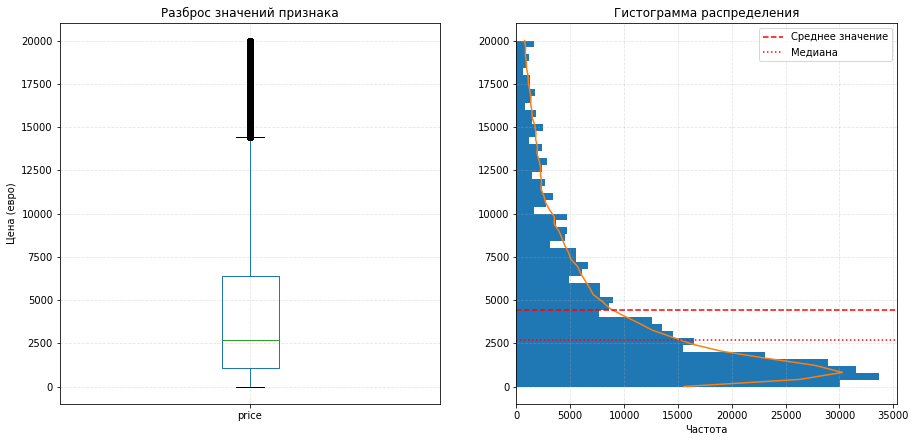

Описательная информация для признака 'price':
Минимальное значение: 0.0 	|	Максимальное значение: 20000.0
Среднее значение: 4416.68
Медиана: 2700.0
Межквартильный размах IQR: 5350.0
Границы нормальных значений: от 0.0 до 14425.0


In [37]:
stat_num(data, 'price')

Обращает на себя внимание большое количество автомобилей с низкой ценой. 

Рассмотрим более подробно сегмент до 500 евро:

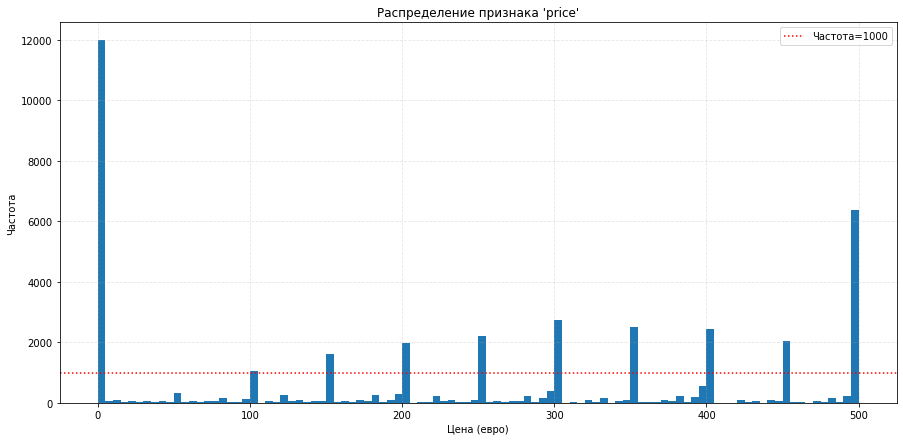

In [38]:
data.query('0 <= price <= 500')['price'].hist(bins=100)
plt.axhline(1000, color='r', linestyle=':', label='Частота=1000')
plt.xlabel(feature_dsc['price'])
plt.ylabel('Частота')
plt.title("Распределение признака 'price'")
plt.legend()
plt.show()

Заметен пик предложений автомобилей с ценой равной 0.

Отобразим 10 случайных строк для таких авто:

In [39]:
print('Количество строк:', data.query('price == 0').shape[0])
data.query('price == 0').sample(10)

Количество строк: 10772


,price,vehicle_type,reg_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
121207,0,wagon,1993,manual,0,100,150000,petrol,audi,NaN
60074,0,NaN,1990,manual,136,90,150000,petrol,audi,NaN
47489,0,NaN,2016,NaN,60,fiesta,100000,NaN,ford,yes
247925,0,suv,1983,auto,177,other,50000,petrol,opel,no
60137,0,convertible,1996,manual,60,punto,150000,petrol,fiat,no
32104,0,sedan,1998,manual,118,3er,100000,petrol,bmw,NaN
13005,0,wagon,1997,manual,101,golf,150000,petrol,volkswagen,NaN
143005,0,wagon,2005,manual,0,zafira,150000,gasoline,opel,yes
87783,0,sedan,1995,manual,218,7er,150000,NaN,bmw,NaN
208519,0,small,2003,manual,80,micra,100000,NaN,nissan,yes


Также отобразим минимальную цену авто превышающую частотный порог 1000:

In [40]:
# Подсчет частот вхождений:
price_counts = data.query('5 < price')['price'].value_counts()

# Находим минимальное значение price превышающее порог 1000:
min_price = price_counts[price_counts >= 1000].index.min()
min_price

100

Несколько предположений по поводу цены:
* Наблюдается 10772 предложений автомобилей с ценой 0 евро. Это ~3 % от всего объема данных.
* Само по себе значение цены равное 0 может быть правдоподоным, обозначающим, что автомобиль при каких-то сочетаниях характеристик полностью теряет свою стоимость.
* Но если посмотреть на записи из таблицы для авто с ценой 0 евро, можно заметить, что автомобили имеют весьма разные характеристики, в том числе <ins>относительно свежего года выпуска</ins> <ins>без ремонта</ins>.
* Кроме того, если предположить, что предложения авто с ценой 0 евро отражают реальную картину, то количество таких предложений было бы соразмерно предложениям с близкой ценой, например, со значениями вплоть до 500 евро. Однако, заметно явное преобладание предложений авто с ценой равной 0.
* Интерепретирую сочетание указанных фактов для авто с ценой 0 как ошибочное.
* Решаю ввести нижний порог по цене: в качестве нижней границы возьму условную цену в 100 евро, поскольку количество предложений с подобной ценой более 1000 штук.

Отобразим количество данных, которые будут удалены:

In [41]:
data.query('~(price >= @min_price)').shape[0]

13314

Отфильтруем данные:

In [42]:
data = data.query('price >= @min_price')

Отобразим описательную информацию:

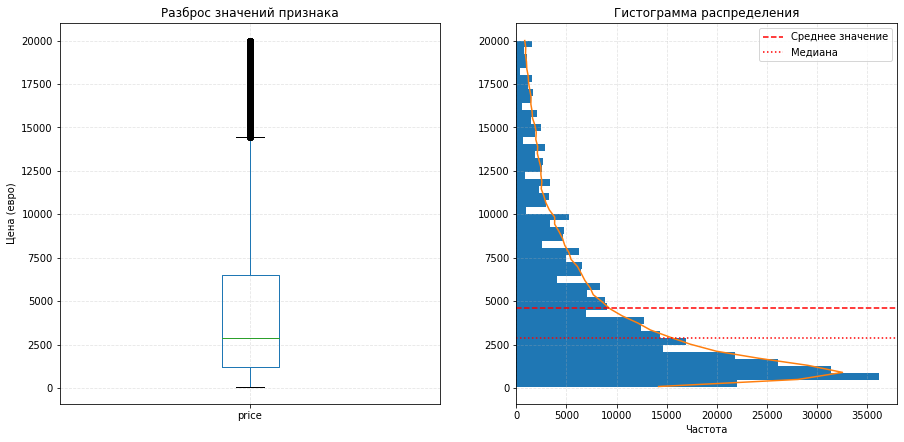

Описательная информация для признака 'price':
Минимальное значение: 100.0 	|	Максимальное значение: 20000.0
Среднее значение: 4588.89
Медиана: 2900.0
Межквартильный размах IQR: 5300.0
Границы нормальных значений: от 100.0 до 14450.0


In [43]:
stat_num(data, 'price')

**Вывод**:
* Удалены явно аномальные строки со значением `price=0`
* Также отфильтрованы строки со слишком низкой ценой - установлен ценовой порог 100 евро, как минимальный порог с частотой 1000.
* После фильтрации данных границы нормальных значений: от 100.0 до 14450.0 евро
* Присутсвуют записи с ценой выходящей за пределы, но это вполне нормально.

[Вернуться к оглавлению](#point0)

#### Признак `reg_year`
Признак отображает год регистрации автомобиля.

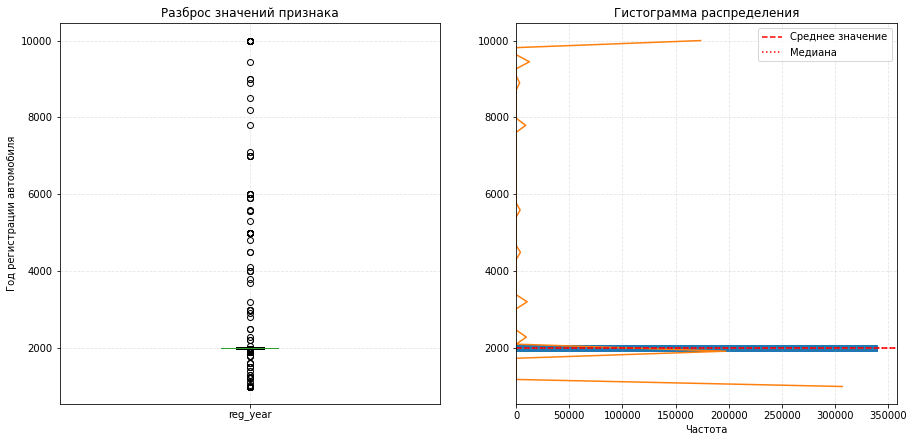

Описательная информация для признака 'reg_year':
Минимальное значение: 1000.0 	|	Максимальное значение: 9999.0
Среднее значение: 2003.96
Медиана: 2003.0
Межквартильный размах IQR: 9.0
Границы нормальных значений: от 1985.5 до 2021.5


In [44]:
stat_num(data, 'reg_year')

⚠️ Наблюдается множество явно аномальных значений для признака `reg_year`!

Отобразим топ-5 максимальных значений для годов 21 века:

In [45]:
print(sorted([i for i in data['reg_year'].unique() if str(i).startswith('20')], reverse=True)[:5])

[2066, 2019, 2018, 2017, 2016]


В качестве верхней границы для признака `reg_year` возьму **2016** - это максимальное значение года 'даты скачивания анкеты из базы', которое было предварительно зафиксировано.

В качестве нижней границы я возьму значение соответствующее 1-процентилю, потому что количество предложений для ранних годов невелико, следовательно и качество предсказания будет невысоким.

In [46]:
year_min = data['reg_year'].quantile(0.01)
print('Нижняя граница:', year_min)

Нижняя граница: 1980.0


Вопрос - как лучше поступить: совсем удалить эти данные или заменить для таких строк значение признака на пропуск.  
Проверим какая доля таких строк:

In [47]:
pd.DataFrame({'Количество':[data.query('reg_year > @year_max').shape[0], 
                            data.query('reg_year < @year_min').shape[0]],
              'Доля, %':[100 * data.query('reg_year > @year_max').shape[0] / data.shape[0],
                         100 * data.query('reg_year < @year_min').shape[0] / data.shape[0]]}, 
             index=['Выше границы','Ниже границы'])

,Количество,"Доля, %"
Выше границы,13687,4.01
Ниже границы,3065,0.90


Выше границы (то есть 'год регистрации автомобиля' больше максимального значения года даты скачивания анкеты) находится 4% данных. Тем не менее, эта эти записи явно имеют ошибку.

Отфильтрую данные:

In [48]:
data = data.query('@year_min <= reg_year <= @year_max')

Отобразим описательную информацию:

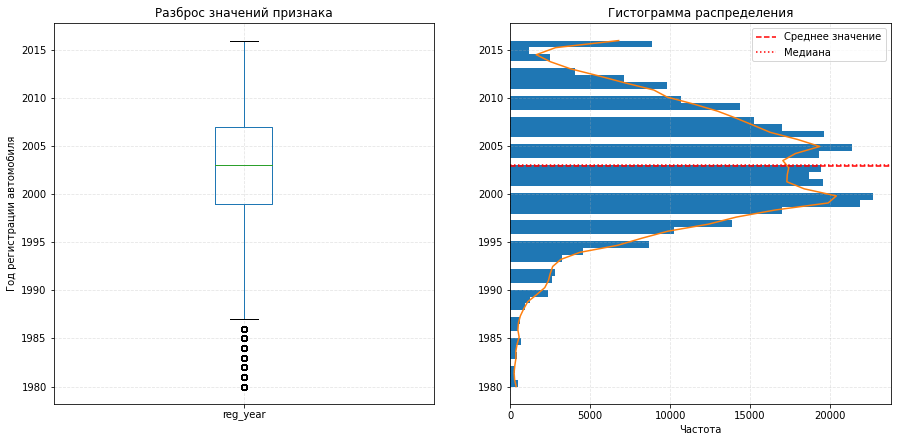

Описательная информация для признака 'reg_year':
Минимальное значение: 1980.0 	|	Максимальное значение: 2016.0
Среднее значение: 2002.93
Медиана: 2003.0
Межквартильный размах IQR: 8.0
Границы нормальных значений: от 1987.0 до 2016.0


In [49]:
stat_num(data, 'reg_year')

**Вывод**: 
* Удалено около 5% данных с аномальными значениями признака 'год регистрации автомобиля'
* Наблюдается трехмодальное распределение данных с пиками около 1999, 2005, 2016 годов.

[Вернуться к оглавлению](#point0)

#### Признак `power`
Признак отображает мощность (л. с.) автомобиля.

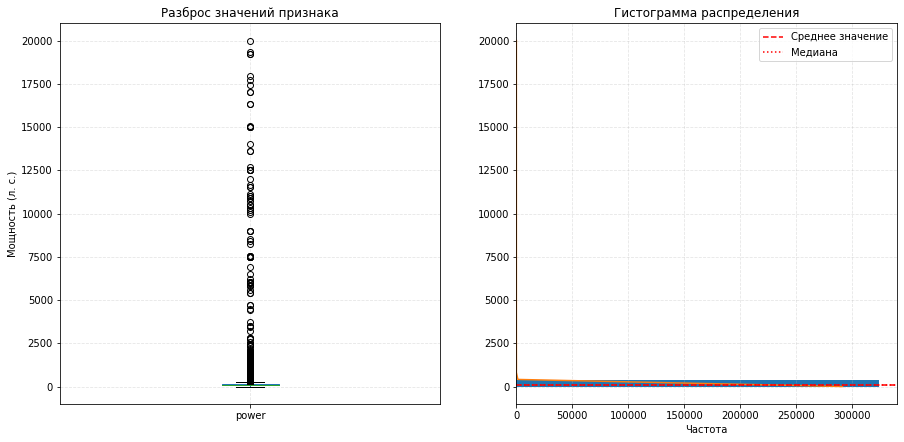

Описательная информация для признака 'power':
Минимальное значение: 0.0 	|	Максимальное значение: 20000.0
Среднее значение: 112.64
Медиана: 105.0
Межквартильный размах IQR: 70.0
Границы нормальных значений: от 0.0 до 248.0


In [50]:
stat_num(data, 'power')

Для признака `power` также наблюдаются аномальные значения.

Рассмотрим сегмент мощности до 100 л.с.:

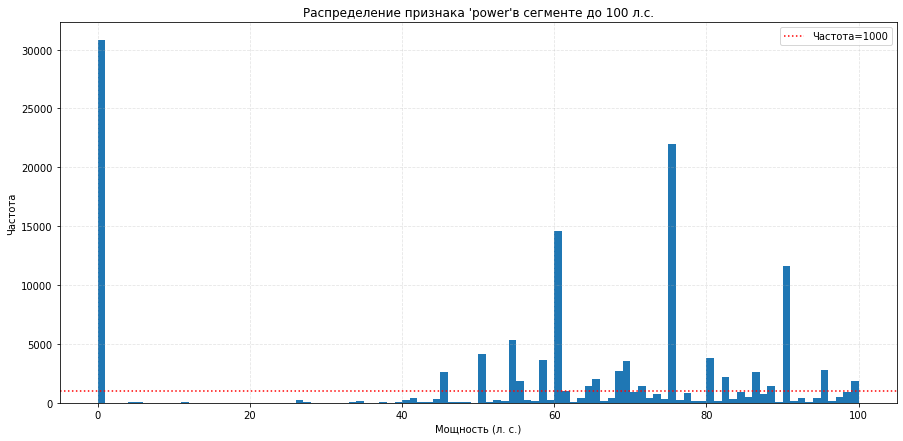

In [51]:
data.query('0 <= power <= 100')['power'].hist(bins=100)
plt.axhline(1000, color='r', linestyle=':', label='Частота=1000')
plt.xlabel(feature_dsc['power'])
plt.ylabel('Частота')
plt.title("Распределение признака 'power'в сегменте до 100 л.с.")
plt.legend()
plt.show()

Отобразим топ-5 значений:

In [52]:
pd.DataFrame({
    'Частота':       data['power'].value_counts(),
    'Доля, %': 100 * data['power'].value_counts(normalize=True)
}).head()

,Частота,"Доля, %"
0,30783,9.49
75,21941,6.77
60,14566,4.49
150,13651,4.21
101,12360,3.81


9.5% представленных автомобилей имеют мощность равную 0. 

Каким бы большим числом не было это значение, это явная ошибка, которую необходимо исключить из датасета:

In [53]:
data = data.query('power > 0')

Отобразим описательную информацию:

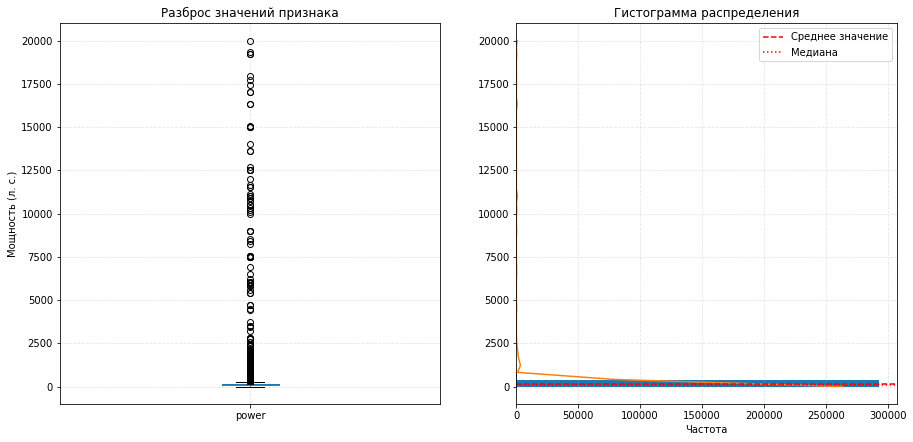

Описательная информация для признака 'power':
Минимальное значение: 1.0 	|	Максимальное значение: 20000.0
Среднее значение: 124.46
Медиана: 113.0
Межквартильный размах IQR: 73.0
Границы нормальных значений: от 1.0 до 259.5


In [54]:
stat_num(data, 'power')

В данных по-прежнему есть явно аномальные значения. 

Уберу еще около 0.6% данных, оставив значения от 0.5 до 99.9 процентилей:

In [55]:
power_low, power_up = data['power'].quantile(0.005), data['power'].quantile(0.999)
print(f"[{power_low}, {power_up}]")
data = data.query('@power_low <= power <= @power_up')

[41.0, 697.940000000177]


Отобразим описательную информацию:

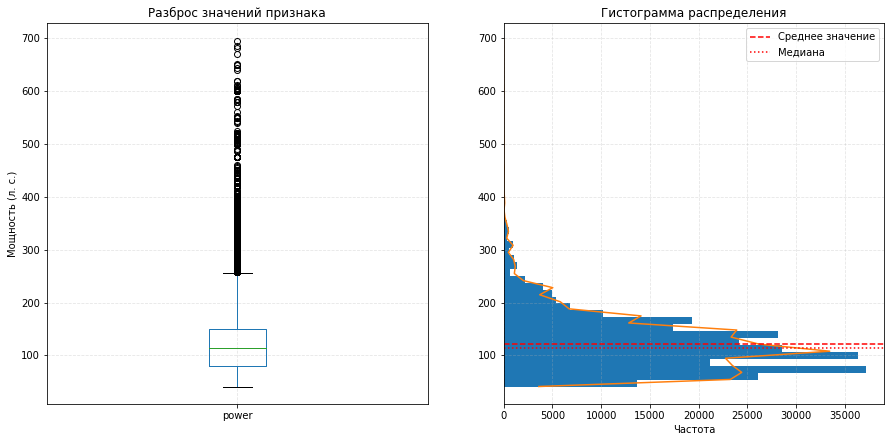

Описательная информация для признака 'power':
Минимальное значение: 41.0 	|	Максимальное значение: 696.0
Среднее значение: 121.23
Медиана: 113.0
Межквартильный размах IQR: 71.0
Границы нормальных значений: от 41.0 до 256.5


In [56]:
stat_num(data, 'power')

**Вывод**:
* Удалено около 10% данных для авто с мощностью равно нулю - это явно аномальные значения.
* Дополнительно отфильтровано еще 0.6% данных для авто либо со слишком низкой мощностью, либо со слишком высокой.
* Границы нормальных значений: от 41.0 до 256.5

[Вернуться к оглавлению](#point0)

### Анализ дискретных числовых и категориальных признаков
#### Признак `vehicle_type`
Признак обозначает тип автомобильного кузова.

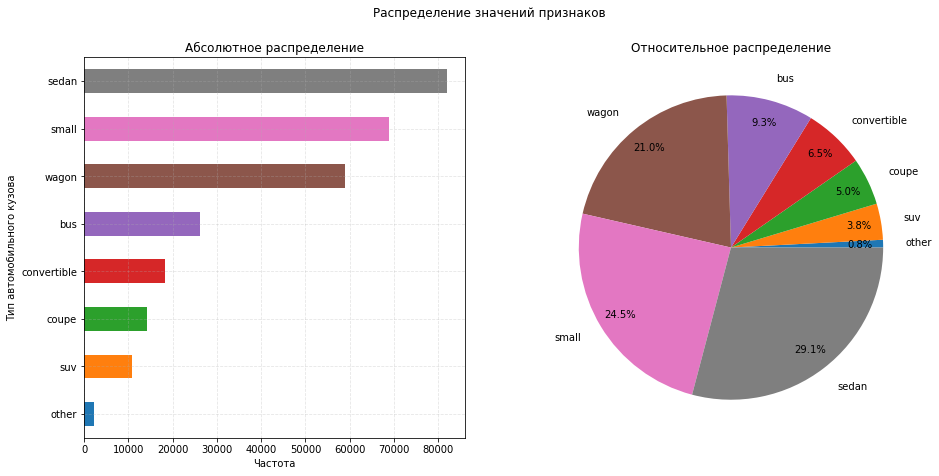

Значения признака 'vehicle_type' распределены следующим образом:
- Всего значений: 292002
- Уникальных значений: 8 ['coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
В том числе:
- coupe: 14103 (4.83%)
- suv: 10796 (3.7%)
- small: 68815 (23.57%)
- sedan: 81903 (28.05%)
- convertible: 18362 (6.29%)
- bus: 26070 (8.93%)
- wagon: 58968 (20.19%)
- other: 2302 (0.79%)


In [57]:
stat_cat(data, 'vehicle_type')

**Вывод**:
* Значения признака `vehicle_type` распределены неравномерно.
* Три самых популярных типа кузова - это sedan, small, wagon.

[Вернуться к оглавлению](#point0)

#### Признак `gearbox`
Признак обозначает тип коробки передач.

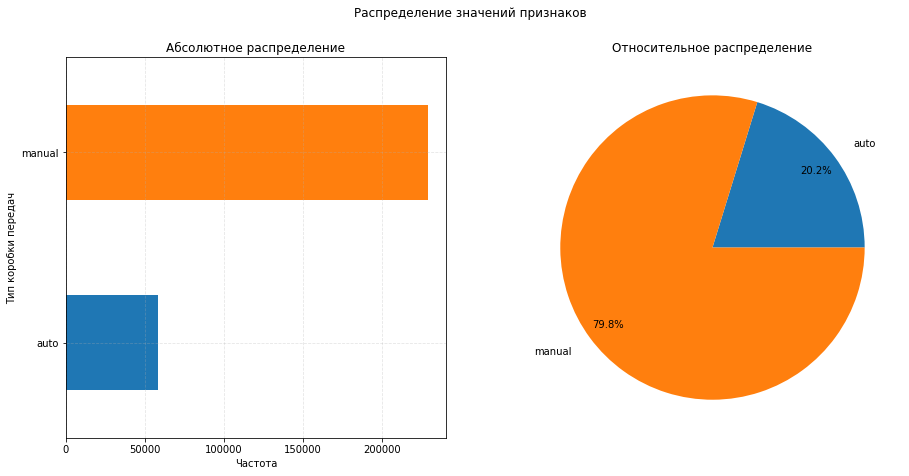

Значения признака 'gearbox' распределены следующим образом:
- Всего значений: 292002
- Уникальных значений: 2 ['manual' 'auto']
В том числе:
- manual: 228836 (78.37%)
- auto: 58069 (19.89%)


In [58]:
stat_cat(data, 'gearbox')

**Вывод**:
* Преобладающее число (79%) автомобилей с ручным типом коробки передач
* 19% имеют автоматическую КПП.

[Вернуться к оглавлению](#point0)

#### Признак `model`
Признак обозначает модель автомобиля.

Отобразим общее количество уникальных значений признака:

In [59]:
len(data['model'].unique())

248

В виду большого количества уникальных наименований моделей я ограничусь выводом информации о топ-20 самых популярных и о топ-20 самых редких моделях.

Самые популярные:

In [60]:
df = pd.DataFrame(pd.pivot_table(data, index=['model'], aggfunc='size'), columns = ['Количество'])
df.sort_values('Количество', ascending=False).head(20)

,Количество
model,
golf,25723
other,21348
3er,18113
polo,10915
corsa,10344
astra,9416
passat,9010
a4,9005
c_klasse,7515


Самые редкие модели:

In [61]:
df = pd.DataFrame(pd.pivot_table(data, index=['model'], aggfunc='size'), columns = ['Количество'])
df.sort_values('Количество', ascending=False).tail(20)

,Количество
model,
move,32
delta,28
b_max,25
9000,23
musa,22
charade,20
200,17
materia,17
q3,13


В данных присутсвуют очень редкие модели авто. 

Я изменю данные о представленных моделях, присвоив моделям, которые встречаются менее 50 раз значение 'other'.

In [62]:
# подсчет количества моделей:
model_counts = data['model'].value_counts()

# фильтрация моделей с частотой менее 50:
rare_models = model_counts[model_counts < 50].index
print('Модели с частотой менее 50:', rare_models.to_list())

# изменение значения редких моделей на other:
data['model'] = data['model'].replace(rare_models, 'other')

Модели с частотой менее 50: ['kaefer', '911', 'lybra', 'v60', 'croma', '145', 'lodgy', 'terios', 'move', 'delta', 'b_max', '9000', 'musa', 'charade', 'materia', '200', 'amarok', 'q3', 'kappa', 'gl', 'elefantino', 'i3', 'samara', 'kalina', 'serie_2', 'rangerover', 'range_rover_evoque', '601']


Еще раз отобразим топ-20 самых непопулярных моделей:

In [63]:
df = pd.DataFrame(pd.pivot_table(data, index=['model'], aggfunc='size'), columns = ['Количество'])
df.sort_values('Количество', ascending=False).tail(20)

,Количество
model,
juke,97
q5,94
antara,93
r19,93
wrangler,91
citigo,90
navara,83
mii,81
90,80


**Вывод**:
* Изначально в данных представлено 248 уникальных моделей авто.
* Довольно редкие модели были перенесены в категорию 'other'.
* После фильтрации данных в начале и в конце списка популярности предсталены модели бренда 'volkswagen':
  * 'volkswagen' 'golf' (27116 шт) - самая популярная
  * 'volkswagen'  'kaefer' (50 шт) - самая редкая

[Вернуться к оглавлению](#point0)

#### Признак `kilometer`
Признак обозначает пробег (км).

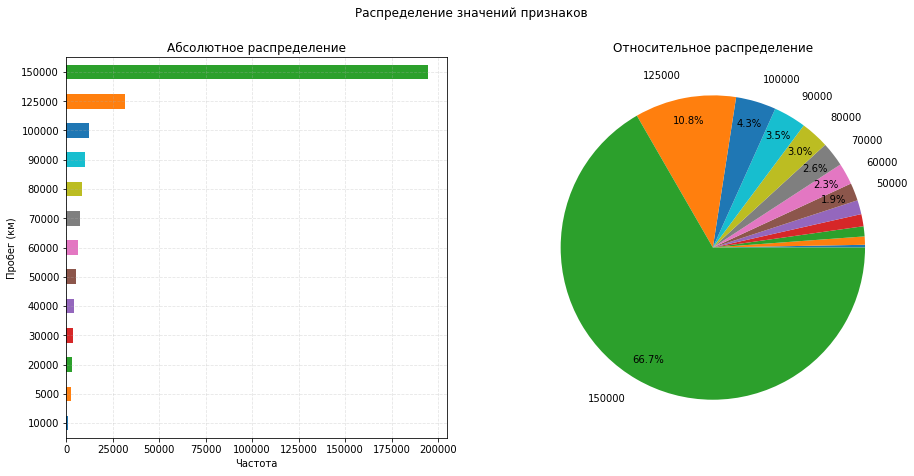

Значения признака 'kilometer' распределены следующим образом:
- Всего значений: 292002
- Уникальных значений: 13 [125000 150000  90000  30000  70000 100000  60000   5000  20000  80000
  50000  40000  10000]
В том числе:
- 125000: 31447 (10.77%)
- 150000: 194695 (66.68%)
- 90000: 10112 (3.46%)
- 30000: 3760 (1.29%)
- 70000: 7612 (2.61%)
- 100000: 12496 (4.28%)
- 60000: 6649 (2.28%)
- 5000: 2566 (0.88%)
- 20000: 3125 (1.07%)
- 80000: 8822 (3.02%)
- 50000: 5495 (1.88%)
- 40000: 4376 (1.5%)
- 10000: 847 (0.29%)


In [64]:
stat_cat(data, 'kilometer', prc=1.5)

**Вывод**:
* Больше половины всех автомобилей имеют самое большое значение пробега - 150000 км.
* Далее частота уменьшается в направлении снижения километража - чем ниже пробег, тем более редкое авто.

[Вернуться к оглавлению](#point0)

#### Признак `fuel_type`
Признак обозначает тип топлива.

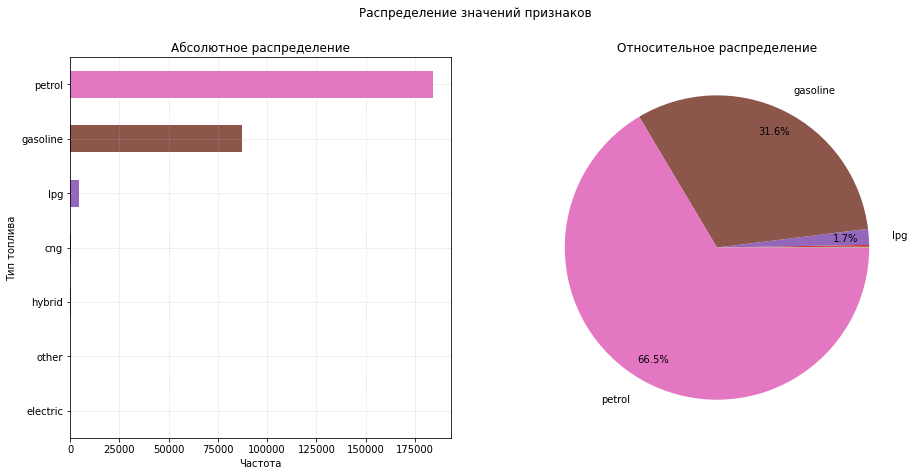

Значения признака 'fuel_type' распределены следующим образом:
- Всего значений: 292002
- Уникальных значений: 7 ['gasoline' 'petrol' 'lpg' 'other' 'hybrid' 'cng' 'electric']
В том числе:
- gasoline: 87478 (29.96%)
- petrol: 184030 (63.02%)
- lpg: 4658 (1.6%)
- other: 53 (0.02%)
- hybrid: 201 (0.07%)
- cng: 478 (0.16%)
- electric: 36 (0.01%)


In [65]:
stat_cat(data, 'fuel_type', prc=1.5)

**Вывод**:
* Данные о типе топлива представлены 7 уникальными значениями.
* В том числе:
  * petrol 62.24%
  * gasoline 29.59%
* Не могу утверждать совершенно точно, но данные из открытых источников говорят, что 'gasoline' и 'petrol' - обозначают один и тот же тип топлива, имеющий разное название в различных регионах.
* Если предыдущее утверждение верно, можно предположить, что 90% всех представленных авто имеют бензиновый двигатель, остальные типы - довольно редки.

[Вернуться к оглавлению](#point0)

#### Признак `brand`
Признак обозначает марку автомобиля.

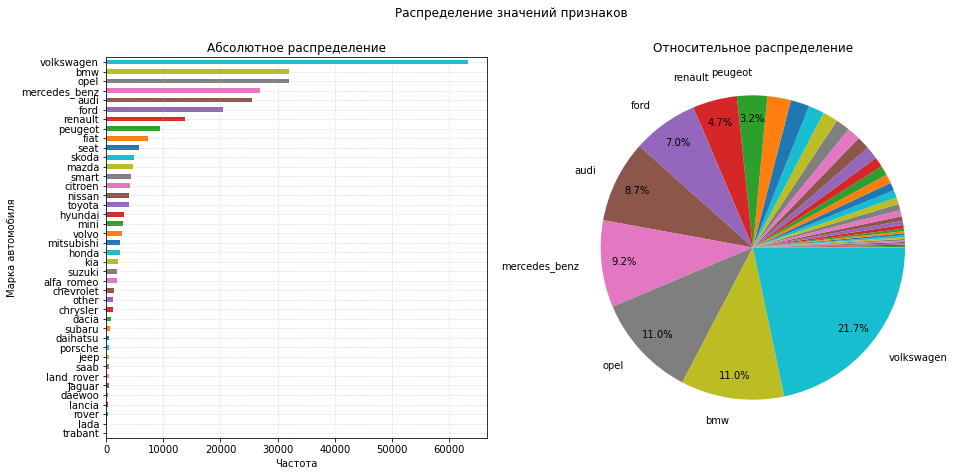

Значения признака 'brand' распределены следующим образом:
- Всего значений: 292002
- Уникальных значений: 40 ['audi' 'jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'seat' 'honda' 'fiat' 'opel' 'mini'
 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'citroen' 'toyota' 'chevrolet' 'dacia' 'daihatsu'
 'chrysler' 'other' 'jaguar' 'daewoo' 'rover' 'porsche' 'saab'
 'land_rover' 'trabant' 'lada']
В том числе:
- audi: 25516 (8.74%)
- jeep: 555 (0.19%)
- volkswagen: 63349 (21.69%)
- skoda: 4929 (1.69%)
- bmw: 32062 (10.98%)
- peugeot: 9357 (3.2%)
- ford: 20401 (6.99%)
- mazda: 4707 (1.61%)
- nissan: 4010 (1.37%)
- renault: 13771 (4.72%)
- mercedes_benz: 26973 (9.24%)
- seat: 5811 (1.99%)
- honda: 2354 (0.81%)
- fiat: 7299 (2.5%)
- opel: 32022 (10.97%)
- mini: 2955 (1.01%)
- smart: 4417 (1.51%)
- hyundai: 3099 (1.06%)
- alfa_romeo: 1929 (0.66%)
- subaru: 638 (0.22%)
- volvo: 2772 (0.95%)
- mitsubishi: 2484 (0.

In [66]:
stat_cat(data, 'brand', prc=2.5)

**Вывод**:
* Признак 'brand' представлен 40 уникальными значениями.
* Данные распределены неравномерно.
* Самая популярная марка авто - volkswagen (21.95%)
* Самая редкая - trabant (0.01%)

[Вернуться к оглавлению](#point0)

#### Признак `repaired`
Признак отображает была машина в ремонте или нет.

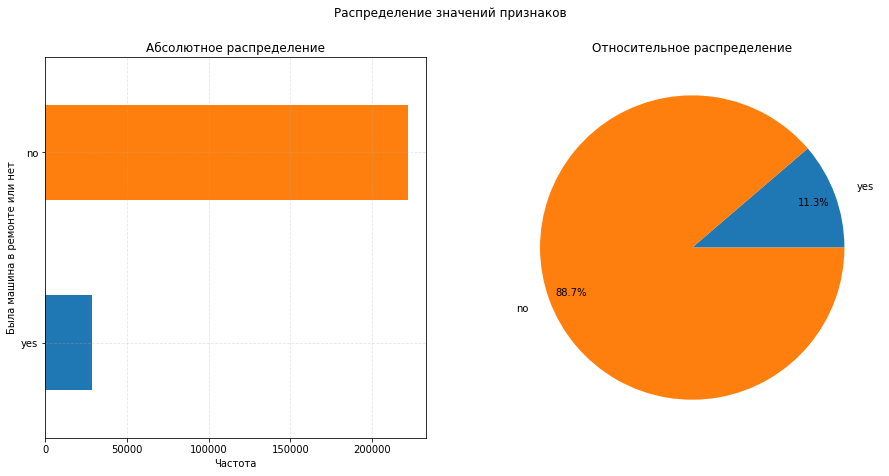

Значения признака 'repaired' распределены следующим образом:
- Всего значений: 292002
- Уникальных значений: 2 ['yes' 'no']
В том числе:
- yes: 28227 (9.67%)
- no: 221988 (76.02%)


In [67]:
stat_cat(data, 'repaired')

**Вывод**:
* В основном представлены авто без ремонта - 75.23%
* Следует помнить, что признак 'repaired' [содержит около 20% пропусков](#Пропуски-в-признаке-repaired).

[Вернуться к оглавлению](#point0)

## Корреляционный анализ
Отобразим матрицу диаграмм рассеяния для количественных признаков в имеющихся датасетах: 

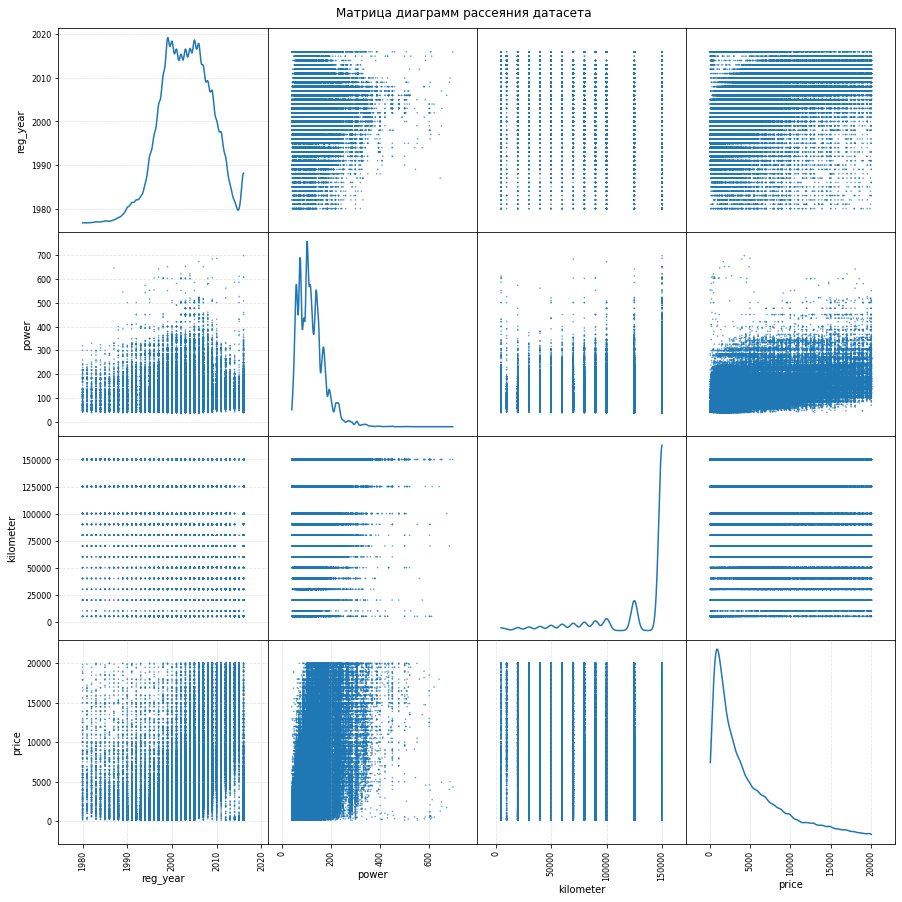

In [68]:
pd.plotting.scatter_matrix(data[['reg_year', 'power', 'kilometer', 'price']], 
                           s=10, alpha=0.7, figsize=(15, 15), diagonal='kde', range_padding=0.3)
plt.suptitle(f"Матрица диаграмм рассеяния датасета", y=0.9)
plt.show()

Для расчета корреляции признаков будем использовать коэффициент корреляции Фи, $\phi_{k}$, поскольку в таблице наших данных содержатся как количественные, так и категориальные признаки.

Сформируем матрицу корреляции со значениями $\phi_{k}$ для наших данных.

In [69]:
# создаём список с наименованиями непрерывных признаков:
interval_cols = ['price', 'power']

In [70]:
# формируем матрицу корреляции:
phik_overview = data.phik_matrix(interval_cols=interval_cols)
phik_overview

,price,vehicle_type,reg_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
price,1.00,0.27,0.66,0.33,0.48,0.58,0.33,0.26,0.36,0.36
vehicle_type,0.27,1.00,0.24,0.29,0.43,0.92,0.19,0.33,0.63,0.08
reg_year,0.66,0.24,1.00,0.13,0.22,0.64,0.63,0.35,0.28,0.20
gearbox,0.33,0.29,0.13,1.00,0.56,0.65,0.03,0.15,0.52,0.04
power,0.48,0.43,0.22,0.56,1.00,0.74,0.09,0.23,0.54,0.07
model,0.58,0.92,0.64,0.65,0.74,1.00,0.44,0.53,1.00,0.15
kilometer,0.33,0.19,0.63,0.03,0.09,0.44,1.00,0.16,0.26,0.12
fuel_type,0.26,0.33,0.35,0.15,0.23,0.53,0.16,1.00,0.28,0.04
brand,0.36,0.63,0.28,0.52,0.54,1.00,0.26,0.28,1.00,0.09
repaired,0.36,0.08,0.20,0.04,0.07,0.15,0.12,0.04,0.09,1.00


Отобразим матрицу корреляции в виде тепловой карты:

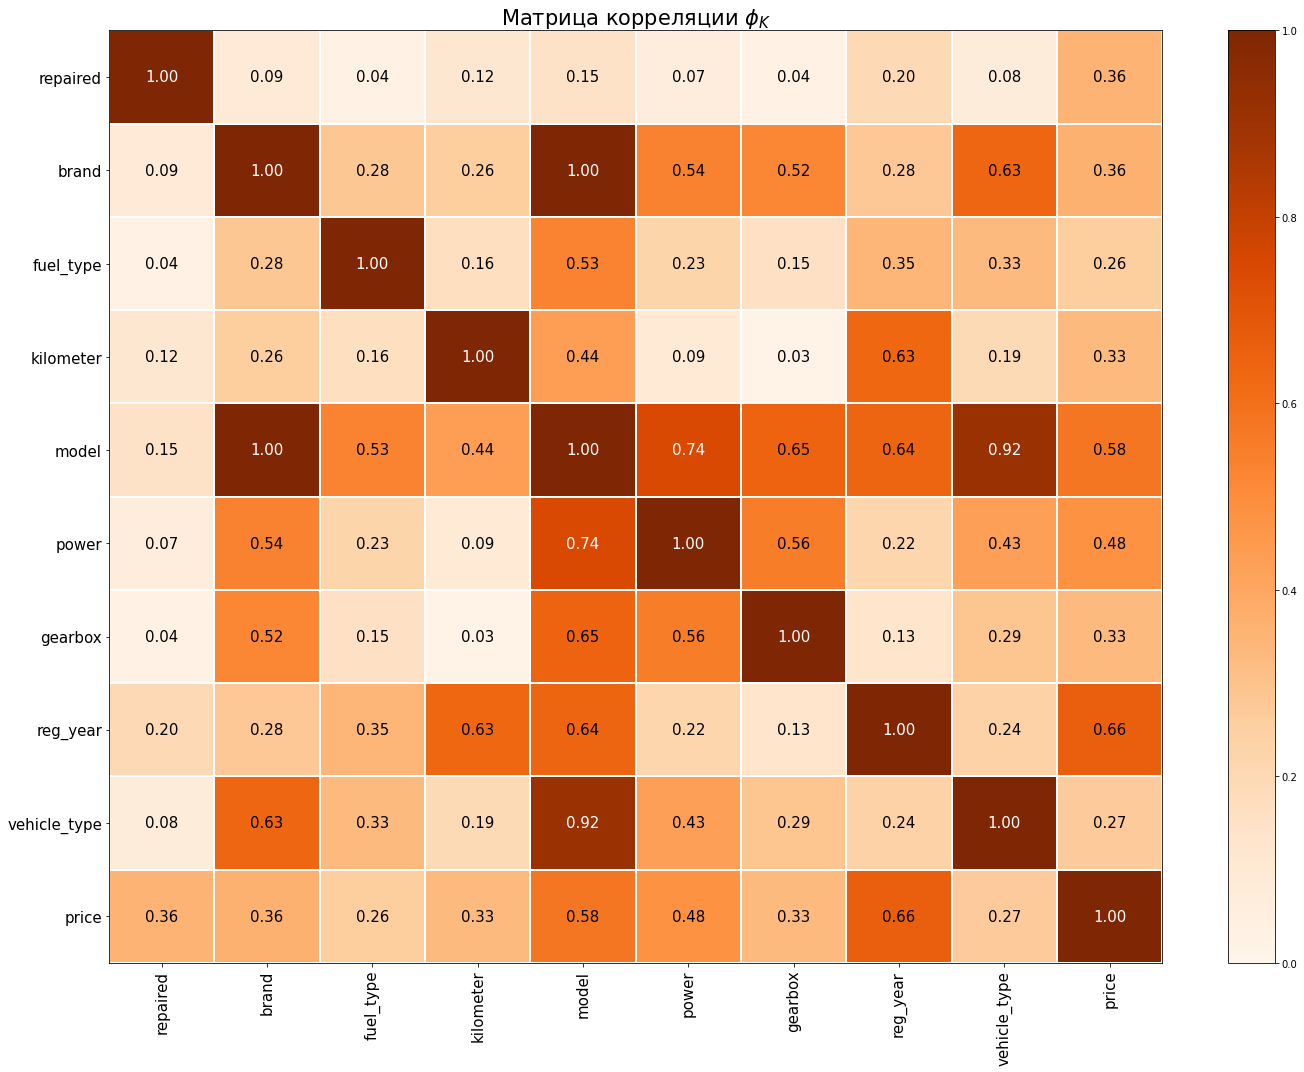

In [71]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Oranges',
    title=r'Матрица корреляции $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)
plt.grid(visible=False)
plt.show()

**Вывод**:
* Наибольшую величину коэффициента корреляции Фи, $\phi_{k}$ с целевым признаком показывает признак `reg_year` - 0.66
* Признаки `model` и `power` также показывают заметную корреляцию - $\phi_{k}$ 0.58 и 0.48 соответственно.
* Признаки `repaired` и `kilometer` отображающие ремонт и пробег авто показывают умеренную корреляцию - $\phi_{k}$ 0.36 и 0.33 , что довольно странно. Я ожидал, что эти признаки оказывают более существенное влияние на цену.

[Вернуться к оглавлению](#point0)

## Обучение моделей
1. Для решения задачи регрессии - определение рыночной стоимости автомобиля - необходимо обучить модели и найти лучшую по критериям, которые важны для заказчика, а именно:
  * качество предсказания;
  * время обучения модели; 
  * время предсказания модели.
2. Целевой признак `price` - цена автомобиля (евро).
3. Обучающие признаки выбраны на основе данных корреляционного анализа, а также из общих соображений взаимозависимости:
  * `model` - модель автомобиля
  * `reg_year` - год регистрации автомобиля
  * `power` - мощность (л. с.)
  * `repaired` - была машина в ремонте или нет

[Вернуться к оглавлению](#point0)

### Создание выборок

Зададим переменные с обучающими и целевым признаками:

In [72]:
X = data[['model', 'reg_year', 'power', 'repaired']]
y = data['price']

Отобразим форму:

In [73]:
X.shape, y.shape

((292002, 4), (292002,))

Сформируем обучающую и тестовую выборки для данных.
* `test_size=TEST_SIZE` - выборки делятся в пропорции <span style="border-width:2px; border-style:solid; border-color:#ddb62b; padding: 3px;">75% {обучающая}</span> + <span style="border-width:2px; border-style:solid; border-color:#d160c4; padding: 3px;">25% {валидационная}</span>
* `random_state = RANDOM_STATE` - фиксация псевдослучайности алгоримта разбиения
* Для повышения точности характера распределения целевого признака в обучающей и тестовой выборки я использую стратификацию.
  * Поскольку целевой признак - это числовая непрерывная величина, для возможности стратификации нужно разбить все значения на корзины: `y_binned = pd.cut(y, bins=10, labels=False)`
  * Я разбиваю данные на 10 корзин `bins=10`.

In [74]:
# переменная задающая размер тестовой выборки:
TEST_SIZE = 0.25

# разбиение целевого признака на корзины:
y_binned = pd.cut(y, bins=10, labels=False)

# разбиение X и y на train/test выборки:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify=y_binned)

Графически отобразим характер распределения целевого признака для полного набора данных и полученных выборок:

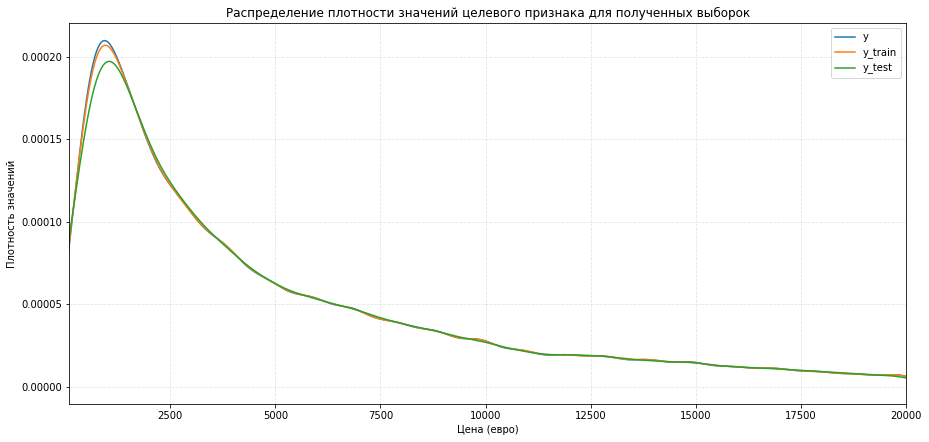

In [75]:
# Графики распределения целевого признака в выборках:
y.plot.kde(label='y')
y_train.plot.kde(label='y_train')
y_test.plot.kde(label='y_test')
plt.title(f"Распределение плотности значений целевого признака для полученных выборок")
plt.xlabel(feature_dsc['price'])
plt.ylabel("Плотность значений")
plt.xlim(y.min(),y.max())
plt.legend()
plt.show()

**Вывод**:
* Сформированы переменные содержащие обучающие и целевой признаки.
* В качестве обучающих признаков выбраны 'model', 'reg_year', 'power', 'repaired' на основании данных корреляционного анализа, а также общих соображений.
* Данные разбиты на обучающие и тествые выборки в пропорции 75/25%.
* Для сохранения характера распределения целевого признака использована стратификация.

[Вернуться к оглавлению](#point0)

### Формирование пайплайна

Сформируем списки признаков для числовых непрерывных величин, а также для **OneHotEncoder** и **OrdinalEncoder** кодирования:

In [104]:
# числовые признаки:
num_columns = ['reg_year', 'power']

# признаки OneHotEncoder-кодирования:
ohe_columns = []

# признаки OrdinalEncoder-кодирования:
ord_columns = ['model', 'repaired']

Обозначим пайплайн **OneHotEncoder**-кодирования:
* Инструмент **SimpleImputer**. Один из категориальных признаков **OneHotEncoder**-кодирования (`dept`) содержит пропуски. Пропуски также могут возникнуть при кодировании неизвестных категорий. Обработать их поможет инструмент **SimpleImputer**, который заменит недостающие значения `missing_values=np.nan` на моду `strategy='most_frequent'`
* Кодировщик **OneHotEncoder** применяется со следующими параметрами:
  * `drop='first'` - обработка дамми-ловушек - каждый первый столбец при кодировании качественного признака будет удалён
  * `handle_unknown='ignore'` - игнорируем неизвестные категории
  * `sparse_output=False` - устанавливает формат данных, в котором кодировщик вернёт результаты. Значение `False` позволит изучать результаты кодирования визуально в ходе исследования

In [105]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) 
    ]
    )

Обозначим пайплайн **OrdinalEncoder**-кодирования:
* `simpleImputer_before_ord` - заполнение пропусков самым часто встречающимся значением с помощью **SimpleImputer** перед кодированием.
* `ord` - проведение Ordinal-кодирования с помощью **OrdinalEncoder**:
  * `handle_unknown='use_encoded_value'`, `unknown_value=np.nan` - неизвестным категория присвоится значение `NaN` 
* `simpleImputer_after_ord` - заполнение пропусков, которые появляются после Ordinal-кодирования.

In [106]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Создаём общий пайплайн для подготовки данных:

In [107]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', 'passthrough', num_columns)
    ],
    remainder='passthrough'
)

Создаём итоговый пайплайн: подготовка данных и модель. В качестве модели по умолчанию - DecisionTreeRegressor:

In [108]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

Создаем сетку, содержающую набор моделей и их гиперпараметров. 

Исследуются модели:

Название модели|Гиперпараметры
-|:-
DecisionTreeRegressor|max_depth: [2,10]
LGBMRegressor|n_estimators: [10,50]

* Модель **LGBMRegressor** задана условием проекта.
* Модель **DecisionTreeRegressor** выбрана как модель имеющая довольно высокую скорость обучения, и приемлемую метрику качества.

В процессе обучения моделей, с целью оптимизации времени, <ins>не применяется</ins> масштабирование числовых признаков, поскольку алгоритмы рассматриваемых моделей нечувствительны к масштабу признаков.

<div style="border:solid orange 2px; padding: 20px">
<font color='red'>*</font> <i>Примечание</i>: значения гиперпаметров получены путем перебора значений для каждой модели и выбора из всех значений некой комбинации <ins>обеспечивающей значение метрики выше порога, заданного условием проекта</ins>. Для финальной сетки оставил небольшое число вариаций с целью сократить время на обучения модели.

In [109]:
param_grid = [
        # Словарь для модели DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE, max_features=100)],
        'models__max_depth': [2,10],
        'preprocessor__num': ['passthrough']  
    },
    
        # Словарь для модели LGBMRegressor
    {
        'models': [LGBMRegressor(random_state=RANDOM_STATE, max_depth=6, num_leaves=31, learning_rate=0.7)],
        'models__n_estimators': [10,50],
        'preprocessor__num': ['passthrough']
    },  
]

В качестве метрики оценки качества моделей используется RMSE, это **задано условием проекта**.   
* Метрика RMSE рассчитывается с помощью стандартной метрики MSE библиотеки `sklearn` с параметром `squared=False`, который возвращает данные в виде корня;
* Алгоритм метрики `rmse_scorer` задается как **поиск наименьшего значения** (опция `greater_is_better=False`)

In [110]:
# определение функции расчета метрики RMSE:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# определение алгоритма метрики:
rmse_scorer = make_scorer(rmse, greater_is_better=False)

Создаем пайплайн с применением автоматизированного поиска гиперпараметров **GridSearchCV** со следующими параметрами:
* Установка модели пайплайна по умолчанию `pipe_final`.
* Применение заданной сетки гиперпараметров моделей `param_grid`.
* `cv=5` - применяется кросс-валидация из 5 блоков
* `scoring=rmse_scorer` - в качестве метрики качества моделей используется RMSE. 
* `n_jobs=-1` - количество вычислительных мощностей (чтобы считалось быстрее, указывают `-1`)

In [111]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1    
) # verbose=10

**Вывод**: сформирован пайплайн с применением автоматизированного поиска гиперпараметров **GridSearchCV**

[Вернуться к оглавлению](#point0)

### Обучение моделей

Запускаем пайплайн на тренировочных данных:

In [112]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         []),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          SimpleImpute...
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [DecisionTreeRegressor(max_features=100,
                                                           random_state=42)],
                          'models__max_depth': [2, 10],
                          'preprocessor__num': ['passthrough']},
                         {'models': [LGBMRegressor(learning_rate=0.7,
                                                   max_depth=6,
                                                   random_state=42)],
                          'models__n_estimators': [10, 50],
                          'preprocessor__num': ['passthrough']}],
             scoring=make_scorer(rmse, greater_is_better=False))

Отобразим полученные результаты:

In [113]:
result = show_gs_result(grid_search)
result.style.format({})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
3,1,LGBMRegressor,1824.532540,1.398787,"{'models': LGBMRegressor(learning_rate=0.7, max_depth=6, random_state=42), 'models__n_estimators': 50, 'preprocessor__num': 'passthrough'}"
2,2,LGBMRegressor,1975.615197,0.827347,"{'models': LGBMRegressor(learning_rate=0.7, max_depth=6, random_state=42), 'models__n_estimators': 10, 'preprocessor__num': 'passthrough'}"
1,3,DecisionTreeRegressor,2048.375090,0.316777,"{'models': DecisionTreeRegressor(max_features=100, random_state=42), 'models__max_depth': 10, 'preprocessor__num': 'passthrough'}"
0,4,DecisionTreeRegressor,3141.779932,0.196858,"{'models': DecisionTreeRegressor(max_features=100, random_state=42), 'models__max_depth': 2, 'preprocessor__num': 'passthrough'}"


**Вывод**:
* С помощью инструмента GridSearchCV получено 4 обученных модели.
* 3 из 4 моделей показали метрику качества выше заданного услоивием порога (RMSE < 2500).

[Вернуться к оглавлению](#point0)

## Анализ моделей
### Выбор лучшей модели по заявленым критериям
Отобразим лучшие результаты двух исследуемых моделей:

In [114]:
best_scores = (result.loc[result.groupby('param_models')['mean_test_score'].idxmin()]
               .sort_values(by='rank_test_score'))
best_scores.style.format({col: '{:.4f}' for col in ['mean_test_score', 'mean_fit_time']})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
3,1,LGBMRegressor,1824.5325,1.3988,"{'models': LGBMRegressor(learning_rate=0.7, max_depth=6, random_state=42), 'models__n_estimators': 50, 'preprocessor__num': 'passthrough'}"
1,3,DecisionTreeRegressor,2048.3751,0.3168,"{'models': DecisionTreeRegressor(max_features=100, random_state=42), 'models__max_depth': 10, 'preprocessor__num': 'passthrough'}"


Условием проекта заданы критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

Информация о 'качестве предсказания' и 'времени обучения' находится в атрибуте `cv_results_` инструмента GridSearchCV.

Необходимо получить информацию о времени предсказания моделей.

Из всех обученных моделей я рассмотрю модели с рангами 1, 3 - это три модели с метрикой качества выше заданного порога.

Для фиксации времени предсказания использую следующий алгоритм:
1. Сформирую таблицу с данными о результатах обучения `cv_results` на основе информации `grid_search.cv_results_`
2. Создам переменную `time_pred` для занесения данных о времени предсказания.
3. Последовательно извлеку гиперпараметры моделей `params` соответствующее их рангам.
4. Инициирую модель с полученными гиперпараметрами.
5. Обучаю инициируюемую модель на train выборке.
6. Фиксирую время предсказания:
  * Фиксирую время старта операции `start_time`
  * Делаю предсказания для рассматриваемой модели <s>`model.predict(X_test)`</s> `model.predict(X_train)`
  * Фиксирую время заврешения операции `end_time`
  * Расчитываю время операции `prediction_time` и добавляю его в переменную `time_pred`

In [115]:
cv_results = pd.DataFrame(grid_search.cv_results_) 

time_pred = list() 

for rank in best_scores['rank_test_score'].values:
    params = cv_results[cv_results['rank_test_score'] == rank]['params'].iloc[0] 

    model = pipe_final.set_params(**params) 
    model.fit(X_train, y_train) 
    
    start_time = time.time() 
    y_pred = model.predict(X_train) 
    end_time = time.time() 
    
    prediction_time = end_time - start_time
    print(params['models'].__class__.__name__, prediction_time)
    time_pred.append(prediction_time) 

LGBMRegressor 0.7070395946502686
DecisionTreeRegressor 0.12050223350524902


Отобразим полученные данные для рассматриваемых моделей:

In [116]:
df = pd.DataFrame({
    'mean_test_score':best_scores['mean_test_score'],
    'mean_fit_time':best_scores['mean_fit_time'],
    'time_pred':time_pred
             }
)
df.index=best_scores['param_models']
df

,mean_test_score,mean_fit_time,time_pred
param_models,,,
LGBMRegressor,1824.53,1.40,0.71
DecisionTreeRegressor,2048.38,0.32,0.12


Графически отобразим сравнительные характеристики:

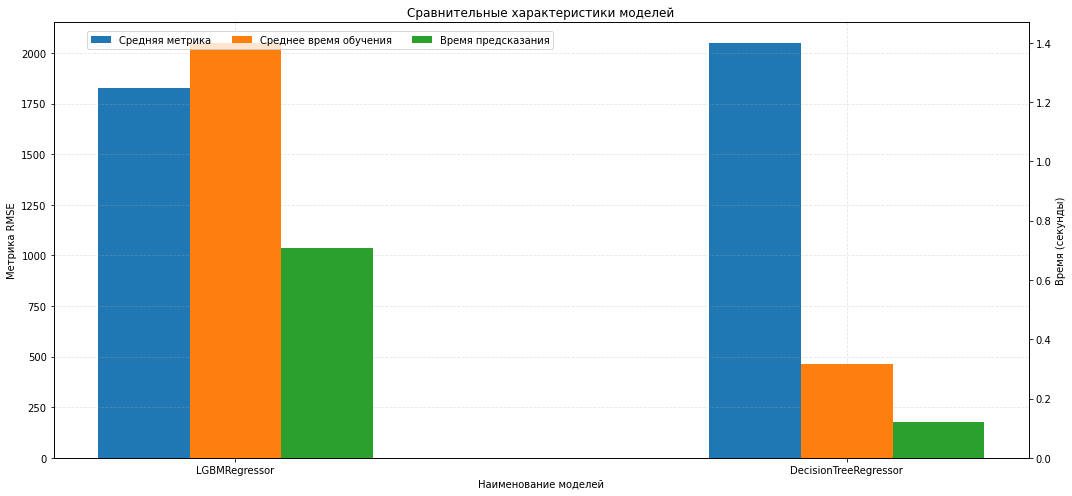

In [117]:
models_compare(df)

**Вывод**:
* Согласно обозначенным заказчиком критериям произведно сравнение обученных моделей.
* Лучшая модель по <font color='#B76B01'>метрике качества</font> - **LGBMRegressor**.
  * RMSE для LGBMRegressor = 1824.53
  * RMSE для DecisionTreeRegressor несколько меньше: 2048.38 максимальная разница около 12%.
* Лучшая модель по <font color='#B76B01'>среднему времени обучения</font> - **DecisionTreeRegressor**
  * Время обучения DecisionTreeRegressor составляет 0.32 секунд
  * Время обучения LGBMRegressor 1.40, разница времени обучения почти в 4 раза
* Лучшая модель по <font color='#B76B01'>времени предсказания</font> - **DecisionTreeRegressor**
  * Время предсказания DecisionTreeRegressor составляет 0.12 секунд
  * Разница времени обучения - почти в 6 раза
* По совокупности характеристик, я бы отдал предпочтение модели **LGBMRegressor** как модели с самой лучшей метрикой качества, при том, что время обучения и время предсказания не столь существенно отличаются от других моделей (хотя, DecisionTreeRegressor делает предсказания почти в 6 раза быстрее, чем LGBMRegressor, сам порядок величин относительно небольшой).
* <font color='red'>*</font> *Примечание: абсолютные величины среднего времени обучения и времени предсказания, а также характер их отличия могут существенно отличаться в зависимости от конфигурации оборудования, поэтому окончательное решение о выборе модели стоит принять после обучения моделей на оборудовании заказчика*.

In [91]:
best_model = grid_search.best_estimator_

[Вернуться к оглавлению](#point0)

### Оценка качества модели на тестовых данных
Рассчитаем метрику лучшей модели на тестовых данных:

In [92]:
y_test_pred = best_model.predict(X_test)
rmse_test = rmse(y_test, y_test_pred)
print(f'Метрика RMSE на тестовой выборке: {rmse_test}')

Метрика RMSE на тестовой выборке: 1821.6610563265604


[Вернуться к оглавлению](#point0)

### Проверка модели на адекватность
Для проверки модели на адекватность я использую модель **DummyRegressor** из библиотеки `sklearn`. Данная модель формирует предсказания на простом принципе - заполняя значения какой-либо постоянной величиной - по умолчанию подставляя среднее значение (`mean`).

In [93]:
# инициализация модели:
dummy_model = DummyRegressor()

# обучение модели на train-выборке:
dummy_model.fit(X_train, y_train)

# формирование предсказаний на основе признаков valid-выборки:
dummy_predictions_test = dummy_model.predict(X_test)

# расчет метрики:
rmse_dummy = rmse(y_test, dummy_predictions_test)

# оценка результата:
if rmse_test < rmse_dummy:
    print("✅ Модель прошла проверку на адекватность: \n  метрика RMSE модели",
              f"'{df.index[0]}' ({rmse_test:.2f})",
              f"лучше, чем у случайной ({rmse_dummy:.2f})")
else:
    print("Модель нуждается в доработке: метрика качества низкая 👎")

✅ Модель прошла проверку на адекватность: 
  метрика RMSE модели 'LGBMRegressor' (1821.66) лучше, чем у случайной (4597.54)


**Вывод**: 
* Выбранная по критериям заказчика модель - **LGBMRegressor**
* Метрика качества модели на тестовых данных: RMSE=1821.66
* Модель прошла проверку на адекватность.

[Вернуться к оглавлению](#point0)

## Общий вывод
Для данных предоставленных сервисом по продаже автомобилей с пробегом «Не бит, не крашен», содержащих информацию о технических характеристиках, комплектации и ценах других автомобилей с поставленной целью - **определение рыночной стоимости автомобиля** - было проведено исследование, в рамках которого:
1. Произведено предварительное изучение и обработка набора данных
* проверена корректность и соответствие предоставленных данных заявленным заказчиком
2. Проведена предварительная обработка данных:
* данные проверены на наличие пропусков
  * в признаках 'vehicle_type', 'gearbox', 'model', 'fuel_type', 'repaired' содержались пропуски
  * для признака 'model' произведено заполнение пропусков на основе группировки данных по категориям: `brand`, `power`, `reg_year`
  * для остальных признаков данные оставлены как есть.
* данные проверены на наличие дубликатов, а также на соответствие типов признаков на подходящие для решения задачи
3. Проведен исследовательский анализ данных
* исследовано распределение обучающих и целевого признака
  * устранены явно аномальные значения числовых признаков (например, нулевая цена или мощность, аномальные значения годов регистрации)
  * для ряда числовых непрерывных признаков отфильтрованы значения значительно выходящие за границы нормальных значений
  * редкие значения признака 'model' перенесены в 'другие'
4. Проведен корреляционный анализ
* Рассчитаны коэффициенты корреляции Фи ($\phi_k$) для признаков датасета
* Наибольшую величину коэффициента корреляции Фи, $\phi_{k}$ с целевым признаком показывает признак `reg_year` - 0.66
* Признаки `model` и `power` также показывают заметную корреляцию - $\phi_{k}$ 0.58 и 0.48 соответственно.
* Признаки `repaired` и `kilometer` отображающие ремонт и пробег авто показывают умеренную корреляцию - $\phi_{k}$ 0.36 и 0.33 , что несколько расходится с ожиданиями. 
5. Для решения задачи регрессии - определение рыночной стоимости автомобиля - произведено обучение и поиск лучшей модели согласно критериям заказчика:
* Поиск моделей осуществлялся с помощью пайплайна - инструмента, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.
* Для решения задачи обучались модели LGBMRegressor и DecisionTreeRegressor с различными гиперпараметрами.
* По условию задания, в качестве метрики оценки качества моделей использовалась RMSE.
* Три обученные модели преодолели заданный условием порог по метрике RMSE < 2500:
  * LGBMRegressor-50: 1824.53
  * LGBMRegressor-10: 1975.61
  * DecisionTreeRegressor: 2048.37
* Для моделей, преодолевших порог качества метрики проведен сравнительный анализ характеристик, среди которых:
  * метрика качества;
  * время обучения модели;
  * время предсказания модели.
* По совокупности характеристик <ins>выбрана лучшая модель</ins> **LGBMRegressor-50**:
  * RMSE=1824.53
  * среднее время обучения модели 1.40 секунд
  * время предсказания модели	0.71 секунд
* Качество выбранной модели проверено на тестовых данных: RMSE=1821.66
* Выбранная модель прошла проверку на адекватность.

[Вернуться к оглавлению](#point0)